# Root finding methods

These are a collection of methods used to find where 1D functions are zero.


## Example:

Find the roots of:

$f(x) = x^2 -1$

$x = +/-1$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## 1. Using scipy.optimize()

In [3]:
x = np.arange(-2, 2, 0.01)

In [6]:
func = lambda x: x**2 - 1

In [7]:
y = func(x)

In [10]:
print(x.shape, y.shape)

(400,) (400,)


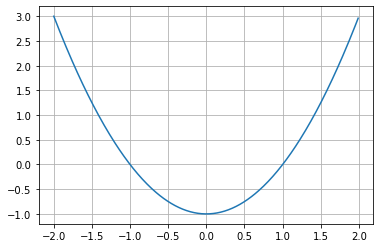

In [13]:
%matplotlib inline

plt.plot(x, y)
plt.grid()

In [19]:
roots_func = opt.fsolve(func, [-10, 20])

In [20]:
print(roots_func)

[-1.  1.]


## 2. Imaginary roots using numpy.roots()


## Example:

Find the roots of:

$f(x) = x^2 +1$

$x = +/-i$

In [21]:
func2 = lambda x: x**2 + 1

In [23]:
y2 = func2(x)

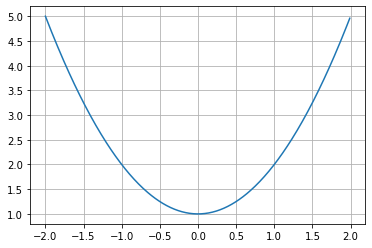

In [24]:
plt.plot(x, y2)
plt.grid()

In [25]:
roots_func2 = opt.fsolve(func2, [-10, 20])

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [52]:
roots_func2 = np.roots([1, 0, 1])

In [51]:
print(roots_func2) #these are not the roots, but the values of the last iteration.

[-0.+1.j  0.-1.j]


## 3. Newton-Rhapson method:

In [28]:
func = lambda x: x**2 - 1

func_prime = lambda x: 2*x

In [29]:
x_0 = 2.0

x_1 = x_0 - (func(x_0))/(func_prime(x_0))

In [30]:
print(x_1)

1.25


In [31]:
x_2 = x_1 - (func(x_1))/(func_prime(x_1))

In [32]:
print(x_2)

1.025


In [33]:
x_3 = x_2 - (func(x_2))/(func_prime(x_2))

In [34]:
print(x_3)

1.0003048780487804


#### Function:

In [38]:
def newton_rhapson(func, func_prime, x_0, tolerance):
    
    if abs(func(x_0)) < tolerance:
        return x_0
    else:
        return newton_rhapson(func, func_prime, x_0 - (func(x_0))/(func_prime(x_0)), tolerance)

In [46]:
x_00 = -10
root_1 = newton_rhapson(func, func_prime, x_0, 1.e-15)
root_2 = newton_rhapson(func, func_prime, x_00, 1.e-15)

In [47]:
print(root_1, root_2)

1.0 -1.0


## 4. Bisection method:

In [75]:
# 1. Get mid point
a = 0.
b = 2.5
tolerance = 1.e-7

c = (a + b)/2

# 2. Evaluate function in c
y = func(c)

In [76]:
print(c, y)

1.25 0.5625


In [77]:
b1 = c

c1 = (a + b1)/2

y1 = func(c1)

In [78]:
print(c1, y1)

0.625 -0.609375


In [79]:
a2 = c1
b2 = c

c2 = (a2 + b2)/2
y2 = func(c2)

In [80]:
print(c2, y2)

0.9375 -0.12109375


In [81]:
a3 = c2
b3 = c

c3 = (a3 + b3)/2
y3 = func(c3)

print(c3, y3)

1.09375 0.1962890625


#### Function:

In [82]:
def bisection(func, a, b, tolerance):
    c = (a + b)/2
    
    if np.abs(func(c)) < tolerance:
        return c
    
    elif np.sign(func(a)) == np.sign(func(c)):
        return bisection(func, c, b, tolerance)
    
    elif np.sign(func(b)) == np.sign(func(c)):  
        return bisection(func, a, c, tolerance)        

In [83]:
a_0 = 0
b_0 = 2.5

a_00 = -2.2
b_00 = 0.1
tolerance = 1.e-17

root_1 = bisection(func, a_0, b_0, tolerance)
root_2 = bisection(func, a_00, b_00, tolerance)
print(root_1, root_2)

1.0 -1.0
